# Project objective

To perform a comprehensive step-by-step exploratory data analysis to understand the 
key factors that influence loan approval.

Following activities would be carried out: -
1. Data loading and inspection
2. Data cleaning
3. Univariate analysis
4. Bivariate analysis
5. Feature engineering
6. Multivariate analysis
7. Data visualization and deriving insights

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#Setting plot style
sns.set(style="whitegrid")

# Data loading and inspection

In [2]:
df=pd.read_csv("/kaggle/input/loan-approval-dataset/loan_approval.csv")
df.head()

,name,city,income,credit_score,loan_amount,years_employed,points,loan_approved
0,Allison Hill,East Jill,113810,389,39698,27,50.0,False
1,Brandon Hall,New Jamesside,44592,729,15446,28,55.0,False
2,Rhonda Smith,Lake Roberto,33278,584,11189,13,45.0,False
3,Gabrielle Davis,West Melanieview,127196,344,48823,29,50.0,False
4,Valerie Gray,Mariastad,66048,496,47174,4,25.0,False


In [3]:
df.shape

(2000, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            2000 non-null   object 
 1   city            2000 non-null   object 
 2   income          2000 non-null   int64  
 3   credit_score    2000 non-null   int64  
 4   loan_amount     2000 non-null   int64  
 5   years_employed  2000 non-null   int64  
 6   points          2000 non-null   float64
 7   loan_approved   2000 non-null   bool   
dtypes: bool(1), float64(1), int64(4), object(2)
memory usage: 111.5+ KB


**Inference from initial inspection: -**
1. Number of rows: 2000
2. Number of columns: 8
3. Number of independent features: 7
4. There are no columns with missing values.

In [5]:
df.describe()

,income,credit_score,loan_amount,years_employed,points
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,90585.977000,573.946000,25308.503000,20.441000,56.680000
std,34487.874907,160.564945,14207.320147,11.777813,18.638033
min,30053.000000,300.000000,1022.000000,0.000000,10.000000
25%,61296.250000,433.000000,12748.750000,10.000000,45.000000
50%,90387.500000,576.000000,25661.500000,21.000000,55.000000
75%,120099.750000,715.000000,37380.500000,31.000000,70.000000
max,149964.000000,850.000000,49999.000000,40.000000,100.000000


# Univariate analysis

In [6]:
df['loan_approved'].value_counts()

loan_approved
False    1121
True      879
Name: count, dtype: int64

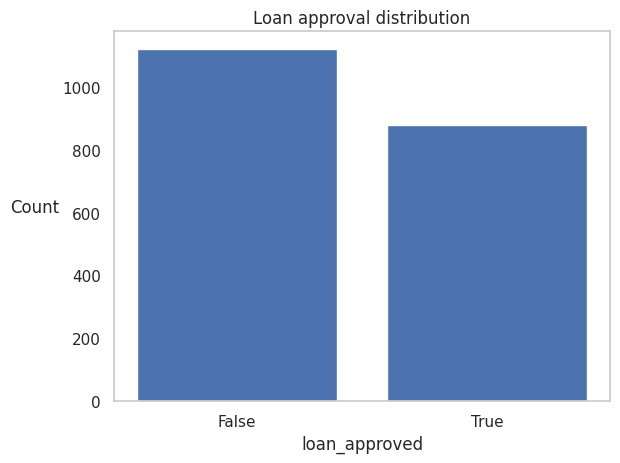

In [7]:
value_counts = df['loan_approved'].value_counts()
plt.bar(value_counts.index.astype(str), value_counts.values)
plt.title("Loan approval distribution")
plt.xlabel("loan_approved")
plt.ylabel("Count", rotation=0, labelpad=20)
plt.grid(False)
plt.show()

**Key insights: -**
* We observed class imbalance for **loan_approved**. We have more number of applicants whose loan was not approved compared to the number of applicants whose loan was approved.

In [8]:
df['city'].value_counts()

city
North Joseph        4
Williamsstad        3
West Elizabeth      3
Port Christopher    3
East Mary           3
                   ..
Lake Sean           1
Williamston         1
Jimenezburgh        1
South Kaylee        1
New Nathantown      1
Name: count, Length: 1882, dtype: int64

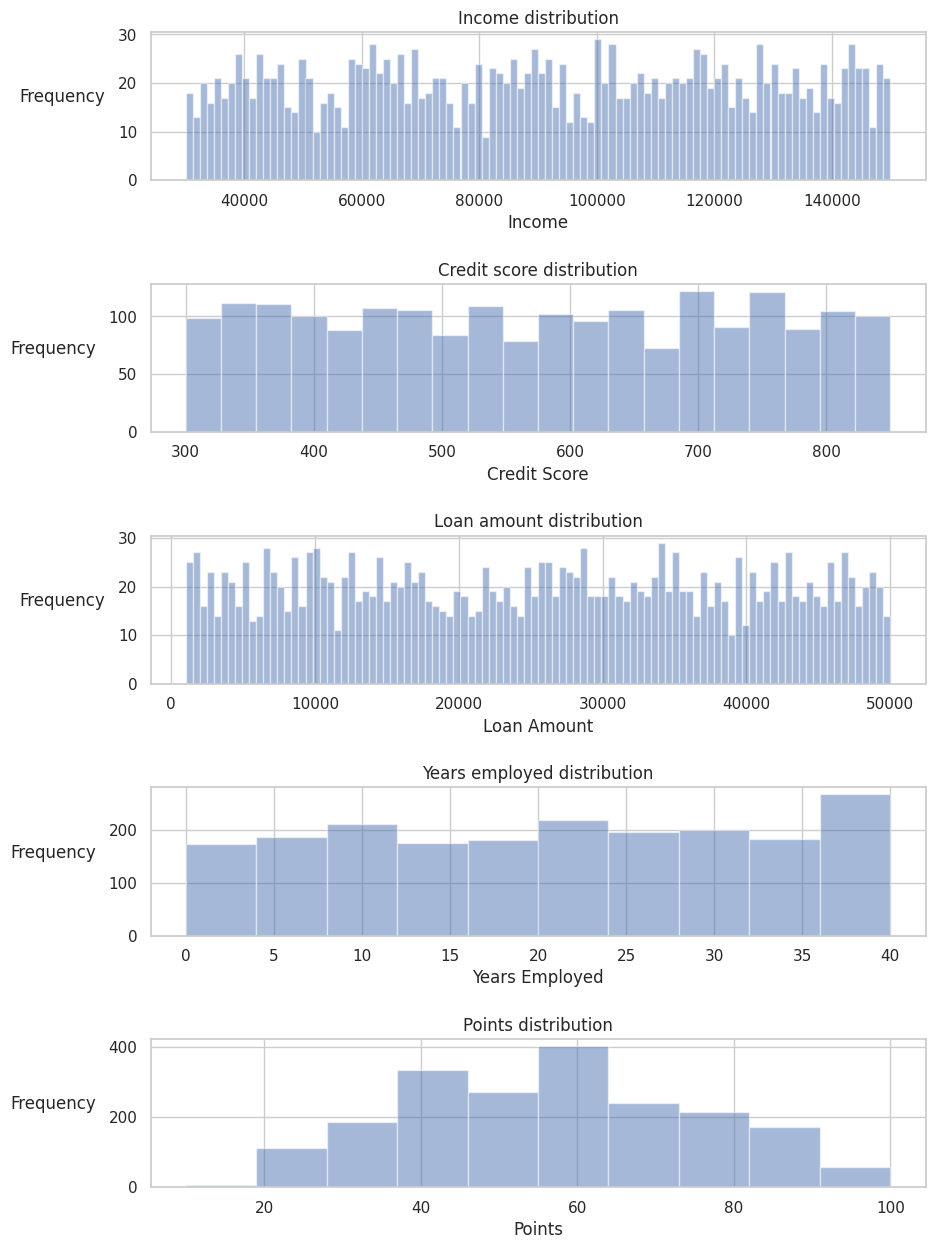

In [9]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 15))

plt.subplots_adjust(hspace=0.7)

axes[0].hist(df['income'], bins=100, color='b', alpha=0.5)
axes[0].set_title('Income distribution')
axes[0].set_xlabel('Income')
axes[0].set_ylabel('Frequency',rotation=0, labelpad=40)

axes[1].hist(df['credit_score'], bins=20, color='b', alpha=0.5)
axes[1].set_title('Credit score distribution')
axes[1].set_xlabel('Credit Score')
axes[1].set_ylabel('Frequency',rotation=0, labelpad=40)

axes[2].hist(df['loan_amount'], bins=100, color='b', alpha=0.5)
axes[2].set_title('Loan amount distribution')
axes[2].set_xlabel('Loan Amount')
axes[2].set_ylabel('Frequency',rotation=0, labelpad=40)

axes[3].hist(df['years_employed'], bins=10, color='b', alpha=0.5)
axes[3].set_title('Years employed distribution')
axes[3].set_xlabel('Years Employed')
axes[3].set_ylabel('Frequency',rotation=0, labelpad=40)

axes[4].hist(df['points'], bins=10, color='b', alpha=0.5)
axes[4].set_title('Points distribution')
axes[4].set_xlabel('Points')
axes[4].set_ylabel('Frequency',rotation=0, labelpad=40)

plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

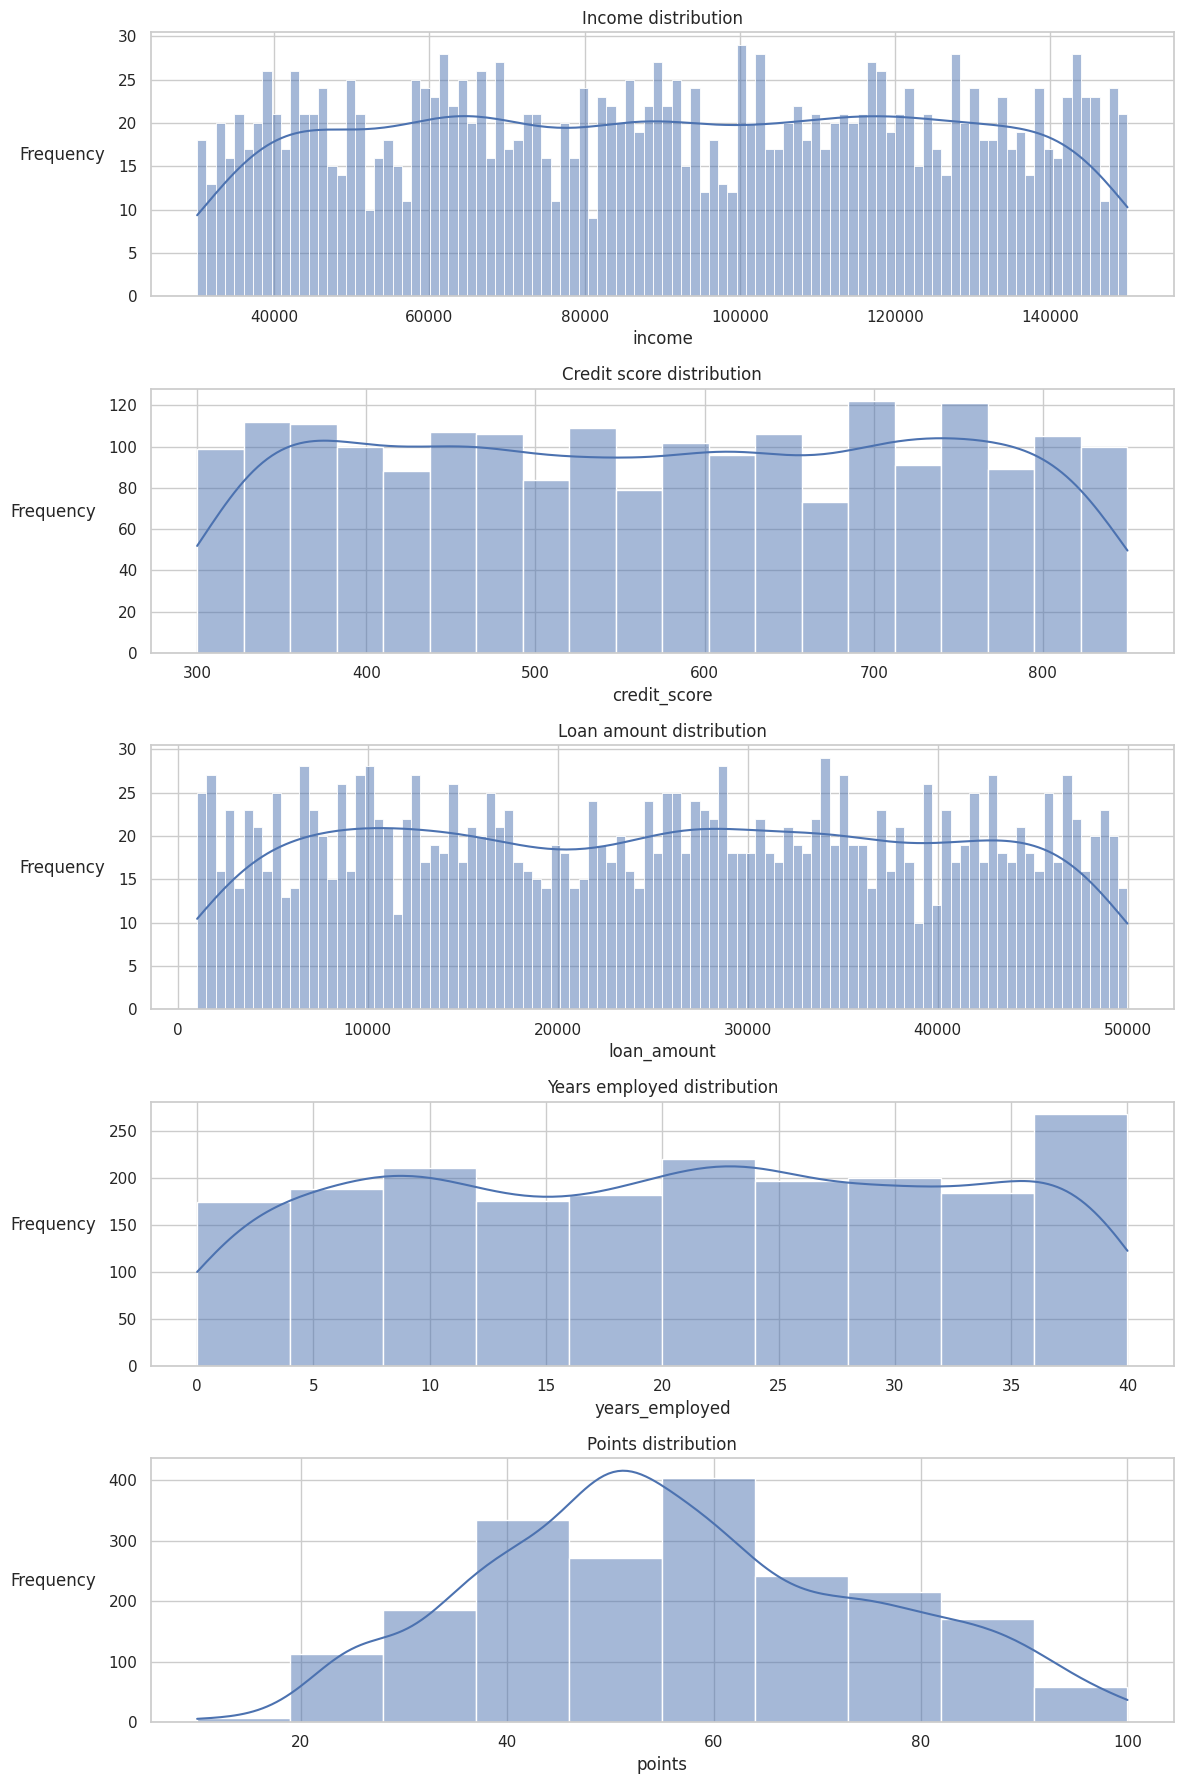

In [10]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(12, 18))
#Plotting income distribution
sns.histplot(ax=axes[0], data=df, x='income', kde=True, bins=100).set_title("Income distribution")
axes[0].set_ylabel("Frequency", rotation=0, labelpad=40)

#Plotting credit score distribution
sns.histplot(ax=axes[1], data=df, x='credit_score', kde=True, bins=20).set_title("Credit score distribution")
axes[1].set_ylabel("Frequency", rotation=0, labelpad=40)

#Plotting loan amount distribution
sns.histplot(ax=axes[2], data=df, x='loan_amount', kde=True, bins=100).set_title("Loan amount distribution")
axes[2].set_ylabel("Frequency", rotation=0, labelpad=40)

#Plotting years employed distribution
sns.histplot(ax=axes[3], data=df, x='years_employed', kde=True, bins=10).set_title("Years employed distribution")
axes[3].set_ylabel("Frequency", rotation=0, labelpad=40)

#Plotting points distribution
sns.histplot(ax=axes[4], data=df, x='points', kde=True, bins=10).set_title("Points distribution")
axes[4].set_ylabel("Frequency", rotation=0, labelpad=40)

plt.tight_layout()

plt.show()

**Key insights: -**
* **points**: The data is normally distributed.
  It peaks around 60 points.
* **For remaining numeric features**, the data is having nearly equal distribution.

# Bivariate analysis

Here we explore relationship between all independent features with the target variable: loan_approved.

**Bivariate analysis for Numeric features**

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


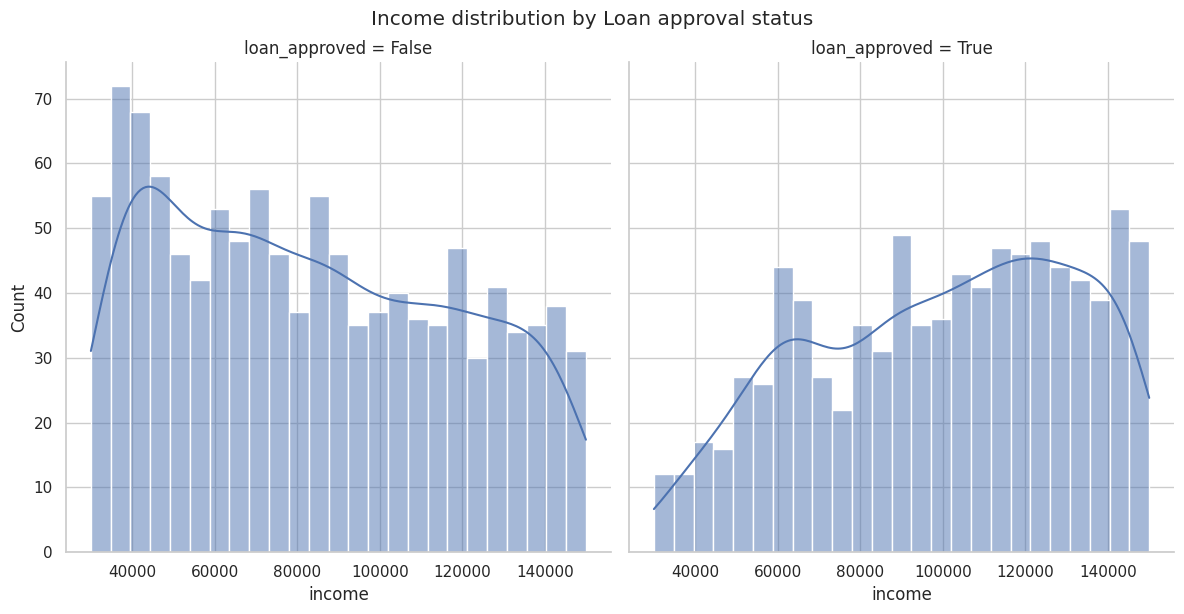

In [11]:
#income vs loan_approved
g=sns.FacetGrid(df, col='loan_approved', height=6)
g.map(sns.histplot, 'income', bins=25, kde=True)
plt.suptitle("Income distribution by Loan approval status", y=1.02)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


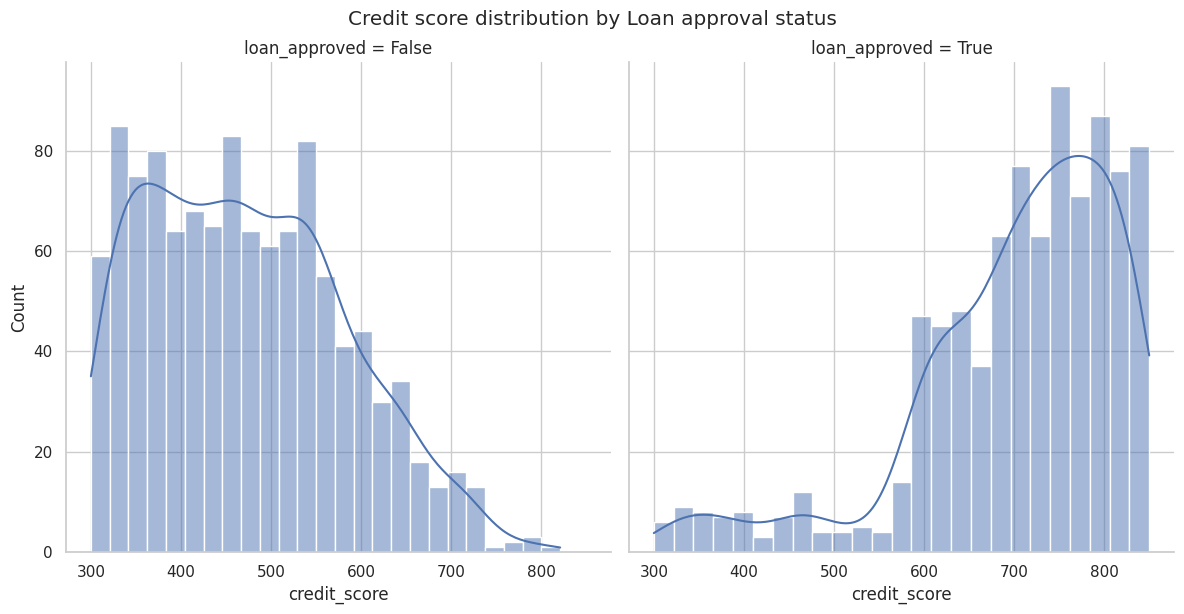

In [12]:
#credit_score vs loan_approved
g=sns.FacetGrid(df, col='loan_approved', height=6)
g.map(sns.histplot, 'credit_score', bins=25, kde=True)
plt.suptitle("Credit score distribution by Loan approval status", y=1.02)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


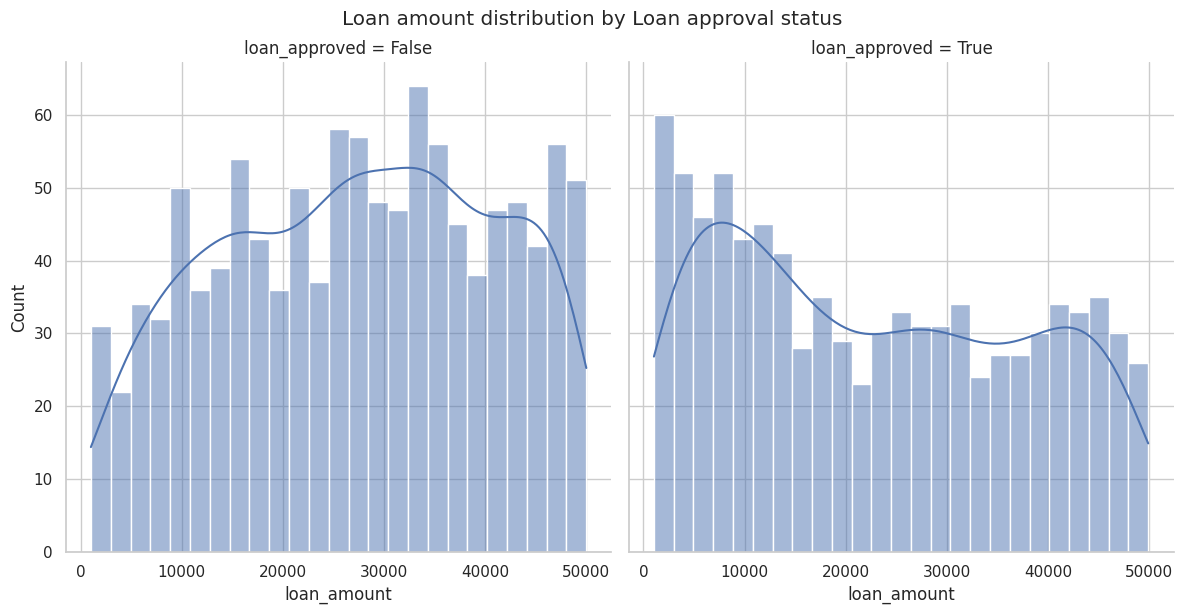

In [13]:
#loan_amount vs loan_approved
g=sns.FacetGrid(df, col='loan_approved', height=6)
g.map(sns.histplot, 'loan_amount', bins=25, kde=True)
plt.suptitle("Loan amount distribution by Loan approval status", y=1.02)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


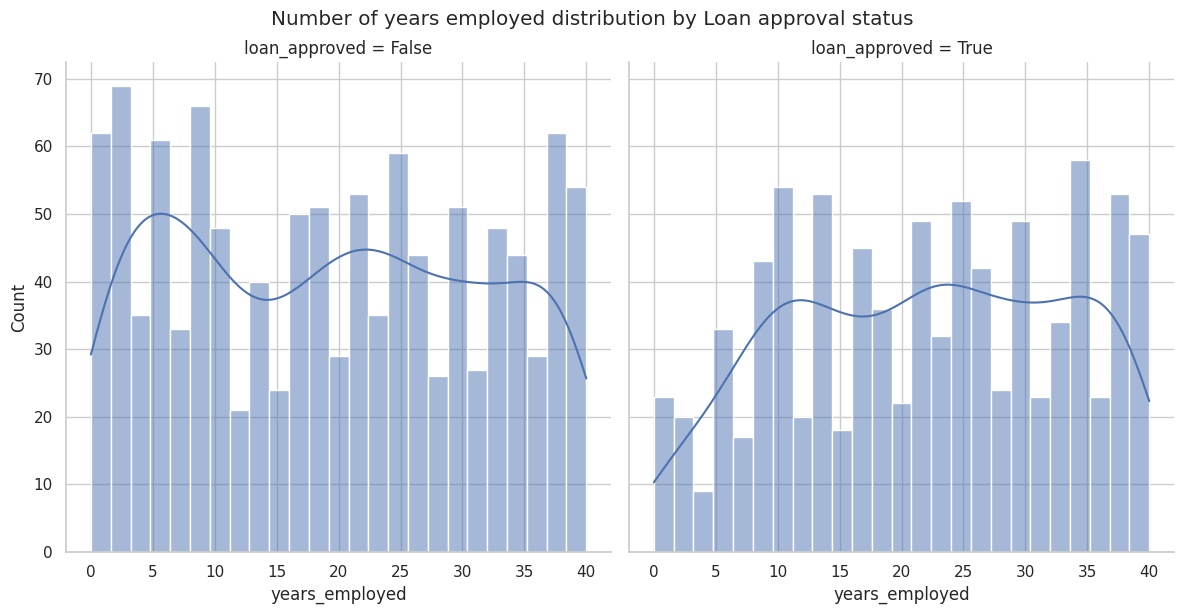

In [14]:
#years_employed vs loan_approved
g=sns.FacetGrid(df, col='loan_approved', height=6)
g.map(sns.histplot, 'years_employed', bins=25, kde=True)
plt.suptitle("Number of years employed distribution by Loan approval status", y=1.02)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


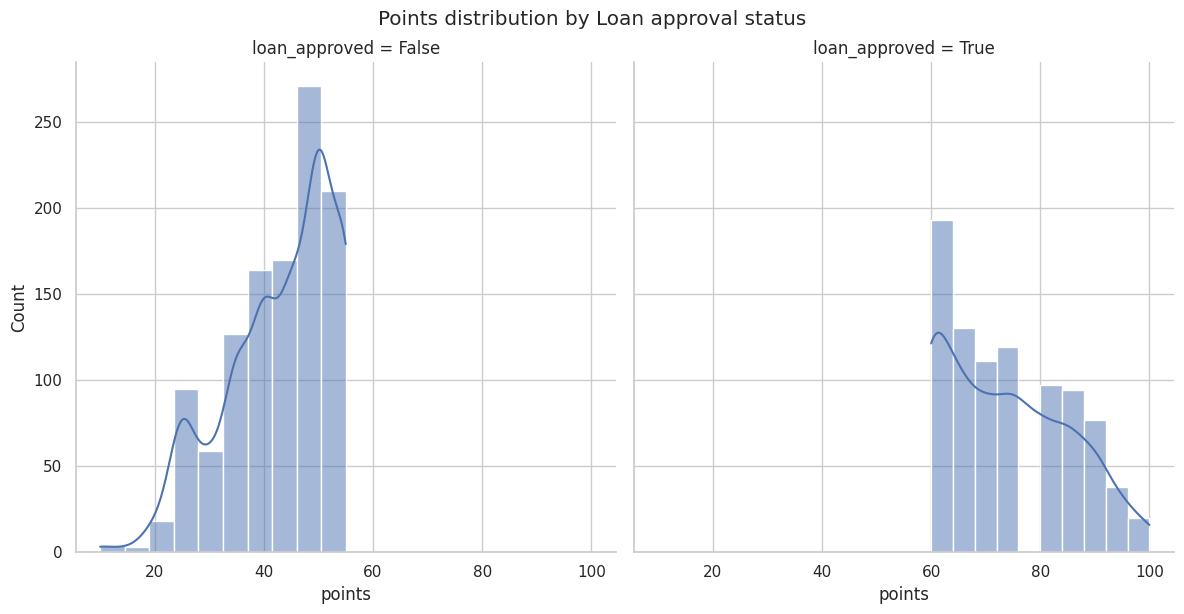

In [15]:
#points vs loan_approved
g=sns.FacetGrid(df, col='loan_approved', height=6)
g.map(sns.histplot, 'points', bins=10, kde=True)
plt.suptitle("Points distribution by Loan approval status", y=1.02)
plt.show()